In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression

In [3]:
#lOAD TRAIN DATA
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
#CLEAN TRAIN DATA: delete columns with numerous undefined values
bounds = [0.2, 0.5]
tX_clean, ind_remov = treat_undefined_values(bounds, columns_correl)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """


In [5]:
#MODEL BUILDING
tx, mean, std = standardize(tX_clean,0)
y, tx = build_model_data(tx,y)

In [6]:
num_samples = len(y)
num_features = tx.shape[1]

num_samples, num_features

(250000, 20)

## Ridge regression using normal equations:

### Linear regression

In [7]:
from cross_validation import cross_validation
from cost import compute_loss_rmse
from plots import *

w_initial = np.random.rand(num_features)
lambdas = np.logspace(-20, -2, 40)
k_fold = 4
seed = 6

# prepare storage of the mean of the weights and rmse for train and test data
ws = np.zeros((num_features, len(lambdas)))
rmse_train = []
rmse_test = []

for ind, lambda_ in enumerate(lambdas):
    # prepare storage of weights and rmse for train and test data for each fold
    ws_tmp = np.zeros((num_features, k_fold))
    rmse_tr = []
    rmse_te = []
    # cross-validation
    for i,k in enumerate(range(k_fold)):
        tx_train, y_train, tx_test, y_test = cross_validation(y, tx, k, k_fold, seed)
        w,_ = ridge_regression(y_train, tx_train, lambda_)
        # store weights and rmse for train and test data for each fold
        ws_tmp[:, i] = w
        rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
        rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
    # store the mean of the weights and rmse for train and test data
    ws[:, ind] = np.mean(ws_tmp, 1)
    rmse_train.append(np.mean(rmse_tr))
    rmse_test.append(np.mean(rmse_te))
    
loss = np.amin(rmse_test)
weights = ws[:, np.argmin(rmse_test)]
lambda_star = lambdas[np.argmin(rmse_test)]


plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
print(" Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
    g=lambda_star, l=loss, we = weights))

KeyboardInterrupt: 

### Polynomial regression

In [ ]:
from cross_validation import cross_validation
from cost import compute_loss_rmse

w_initial = np.random.rand(num_features)
degrees = 8
lambdas = np.logspace(-15, 1, 30)
k_fold = 2
seed = 6

Lambdas_star = []
Loss = []

for indices, degree in enumerate(range(1, degrees+1)):
    
    # prepare storage of the mean of the weights and rmse for train and test data
    ws = np.zeros((num_features*degree, len(lambdas)))
    rmse_train = []
    rmse_test = []

    for ind, lambda_ in enumerate(lambdas):
        # prepare storage of weights and rmse for train and test data for each fold
        ws_tmp = np.zeros((num_features*degree, k_fold))
        rmse_tr = []
        rmse_te = []
        # cross-validation
        for i,k in enumerate(range(k_fold)):
            tx_tr, y_train, tx_te, y_test = cross_validation(y, tx, k, k_fold, seed)
            #form data with polynomial degree
            tx_train = build_poly_all_features(tx_tr, degree)
            tx_test = build_poly_all_features(tx_te, degree)
            #ridge regression
            w,_ = ridge_regression(y_train, tx_train, lambda_)
            # store weights and rmse for train and test data for each fold
            ws_tmp[:, i] = w
            rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
            rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
        # store the mean of the weights and rmse for train and test data
        ws[:, ind] = np.mean(ws_tmp, 1)
        rmse_train.append(np.mean(rmse_tr))
        rmse_test.append(np.mean(rmse_te))

        
    loss = np.amin(rmse_test)
    #weights = ws[:, np.argmin(rmse_test)]
    lambda_star = lambdas[np.argmin(rmse_test)]

    #plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
    #print("Degree={d} Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
       # d=degree, g=lambda_star, l=loss)) #, we = weights))
    print("Degree={d} Best value of lambda = {g} \n Loss = {l}".format(d=degree, g=lambda_star, l=loss))
    
    Lambdas_star.append(lambda_star)
    Loss.append(loss)


Degree=1 Best value of lambda = 0.00010826367338740563 
 Loss = 0.8503266827714623
Degree=2 Best value of lambda = 1e-15 
 Loss = 0.8724819580956794
Degree=3 Best value of lambda = 0.7880462815669904 
 Loss = 0.9559542602338145
Degree=4 Best value of lambda = 0.06210169418915604 
 Loss = 4.9675552399634855
Degree=5 Best value of lambda = 10.0 
 Loss = 111.77832931472047
Degree=6 Best value of lambda = 8.531678524172814e-06 
 Loss = 542.1519781303318
Degree=7 Best value of lambda = 0.01743328822199987 
 Loss = 40919.98420622169


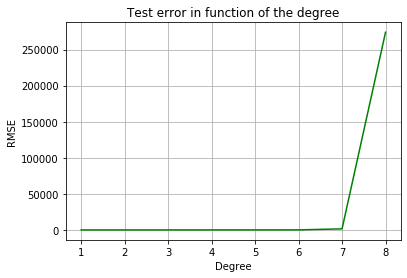

Best degree=1 Best value of lambda = 0.0001 
 Loss = 0.8503266883986379 
 Weights = [-0.31460108  0.09817915 -0.30034324 -0.07479191 -0.18568234 -0.03140919
 -0.0403931  -0.11822224  0.14557187  0.18149619 -0.00055408 -0.00234439
  0.21697569 -0.00081263  0.00203905  0.18194239  0.0010509  -0.0851646
  0.03716229  0.01790202]


In [23]:
plt.plot(range(1, degrees+1), Loss, color='g')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("Test error in function of the degree")
plt.grid(True)
plt.show()

degree_star =  np.argmin(Loss) + 1
Loss_star = np.amin(Loss)
Lambda_star = Lambdas_star[np.argmin(Loss)]

TX_train = build_poly_all_features(tx, degree_star)
Weights_star,_ = ridge_regression(y, tx, Lambda_star)
print("Best degree={d} Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
        d=degree_star, g=Lambda_star, l=Loss_star, we = Weights_star))

In [24]:
#PREDICT TRAINING ACCURACY
training_accuracy = predict_accuracy(y,tx,Weights_star)
training_accuracy

66.0768

## Generate predictions and save ouput in csv format for submission:

In [27]:
DATA_TEST_PATH = 'data/test.csv'
ytest, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

columns_correl = np.delete(tX_test, columns_bad_correl, axis=1)
tX_test_process = np.delete(columns_correl, ind_remove, axis=1)

_, tx_test = build_model_data(tX_test_process,ytest)

In [28]:
OUTPUT_PATH = 'data/submission_ridge.csv'
y_pred = predict_labels(Weights_star, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)